In [3]:
using Revise
using Laconic
using Laconic.Atom
using Laconic.Symbolic
using Laconic.Gaussian
using Laconic.SystemM
using Laconic.DisplayM

┌ Info: Precompiling Laconic [08136afe-955a-11e9-1da2-859b40bd8df4]
└ @ Base loading.jl:1260


In [4]:
cgbfs = []
for ind=1:10
    push!(cgbfs, ContractedGaussianBasisFunction((0,), (0.,), (ind / 10, 1.0,)))
end
basis = GaussianBasis(tuple(cgbfs...))

GaussianBasis{10,1}((ContractedGaussianBasisFunction{1,1}((0,), (0.0,), 1.0, (PrimitiveGaussianBasisFunction{1}(0.1, (0,), (0.0,), 0.1267389463354385),), (1.0,)), ContractedGaussianBasisFunction{1,1}((0,), (0.0,), 1.0, (PrimitiveGaussianBasisFunction{1}(0.2, (0,), (0.0,), 0.21314865129300628),), (1.0,)), ContractedGaussianBasisFunction{1,1}((0,), (0.0,), 1.0, (PrimitiveGaussianBasisFunction{1}(0.3, (0,), (0.0,), 0.2889023225626449),), (1.0,)), ContractedGaussianBasisFunction{1,1}((0,), (0.0,), 1.0000000000000002, (PrimitiveGaussianBasisFunction{1}(0.4, (0,), (0.0,), 0.35847187357690596),), (1.0,)), ContractedGaussianBasisFunction{1,1}((0,), (0.0,), 1.0000000000000002, (PrimitiveGaussianBasisFunction{1}(0.5, (0,), (0.0,), 0.4237772081237576),), (1.0,)), ContractedGaussianBasisFunction{1,1}((0,), (0.0,), 1.0, (PrimitiveGaussianBasisFunction{1}(0.6, (0,), (0.0,), 0.4858738548028009),), (1.0,)), ContractedGaussianBasisFunction{1,1}((0,), (0.0,), 1.0, (PrimitiveGaussianBasisFunction{1}(0.7,

In [9]:
numparticles = 2
builder = IdenticalParticleBuilder(Float64, numparticles, 10, -1)
state = build(builder)
setcoeff!(state, (1,4), 1.0)
statevec = asvector(state);

In [6]:
kin1 = kron(kineticenergyoperator(basis), identity(basis))
kin2 = kron(identity(basis), kineticenergyoperator(basis))
nuc1 = kron(nuclearattractionoperator(basis, (0.,)), identity(basis))
nuc2 = kron(identity(basis), nuclearattractionoperator(basis, (0.,)))
basiscombined = kron(basis, basis)
repulsion = coulomboperator(basiscombined)
hamiltonian = kin1 + kin2 + nuc1 + nuc2 + repulsion;
size(repulsion.matrix)

(100, 100)

In [10]:
hamiltonian_mat = Array{Float64,2}(hamiltonian.matrix)
psi0 = Array{ComplexF64}(statevec)
tspan = (0., 30.)
soln = solve_system(hamiltonian_mat, basiscombined, psi0, tspan);

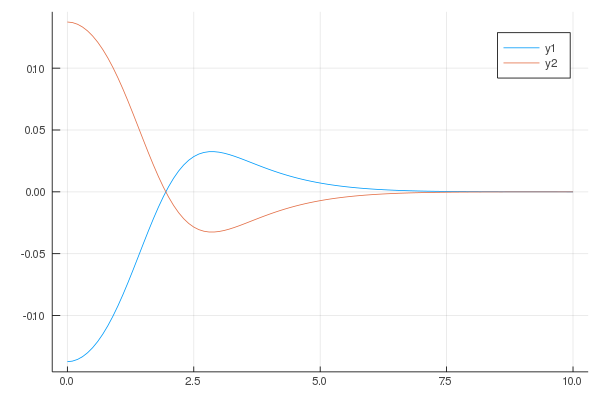

In [15]:
x = Variable("x")
# sym=symbolic(basis, 1, x)
# sym 
# evalexpr(sym, x, [1., 2.])
xrange = 0:.1:10
plotattime(soln, 30., xrange)
# soln.odesol(0.0
# using Plots
# combineterms(symbolic(soln, 2, 0., x))

In [14]:
combineterms(symbolic(soln, 1, 5., x))

(-2.103554357515293e-17 - 3.6034758345244816e-18im)*0.1267389463354385*(1.0^2)*exp(-0.1*(x^2))+(-0.05810659276395675 - 0.17428404409280296im)*0.21314865129300628*(1.0^2)*exp(-0.2*(x^2))+(-0.02824134411113109 - 0.1297858106257012im)*0.2889023225626449*(1.0^2)*exp(-0.3*(x^2))+(-0.013635497343274548 + 0.10229408925415875im)*0.35847187357690596*1.0*1.0000000000000002*exp(-0.4*(x^2))+(0.013743658285275505 - 0.07894606028703477im)*0.4237772081237576*1.0*1.0000000000000002*exp(-0.5*(x^2))+(-0.017446143271025043 - 0.060503458598561745im)*0.4858738548028009*(1.0^2)*exp(-0.6*(x^2))+(-0.03140206310995864 - 0.04237620519021557im)*0.5454232190718755*(1.0^2)*exp(-0.7*(x^2))+(-0.03689312872147654 - 0.030204578294225366im)*0.602875426920206*(1.0^2)*exp(-0.8*(x^2))+(-0.03968219223667036 - 0.025486755811956235im)*0.6585548830521745*1.0*1.0000000000000002*exp(-0.9*(x^2))+(-0.04153380989326316 - 0.02856900704852742im)*0.7127054703549902*(1.0^2)*exp(-1.0*(x^2))+(0.05810659276395665 + 0.17428404409280293im)

In [53]:
getcoeff(state, (5,1))

-1.0